In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("housing.csv") #read to data frame
df.dropna(inplace = True) #drop null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [2]:
from sklearn.model_selection import train_test_split

input = df.drop(['median_house_value'], axis=1)
output = df['median_house_value']

input_train, input_test, output_train, output_test = train_test_split(input, output, test_size = 0.15) #split data into training and testing sets

full_train_data = input_train.join(output_train) #merge input and output into training data set
full_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19031,-122.02,38.37,16.0,2495.0,331.0,1118.0,338.0,6.4894,INLAND,198000.0
20570,-121.96,38.54,6.0,1485.0,318.0,894.0,308.0,3.2222,INLAND,139600.0
10234,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,<1H OCEAN,165800.0
10640,-117.79,33.69,16.0,3067.0,396.0,1275.0,372.0,8.7385,<1H OCEAN,340000.0
2872,-118.95,35.37,37.0,1475.0,327.0,946.0,295.0,1.6728,INLAND,55400.0
...,...,...,...,...,...,...,...,...,...,...
15952,-122.45,37.72,52.0,1729.0,319.0,890.0,300.0,4.3036,NEAR BAY,261800.0
18675,-121.88,36.96,18.0,6355.0,1100.0,2304.0,972.0,6.0281,NEAR OCEAN,321100.0
17310,-119.50,34.35,39.0,308.0,38.0,59.0,21.0,11.7794,NEAR OCEAN,500001.0
12211,-117.22,33.48,5.0,1585.0,247.0,510.0,181.0,6.9136,<1H OCEAN,493300.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

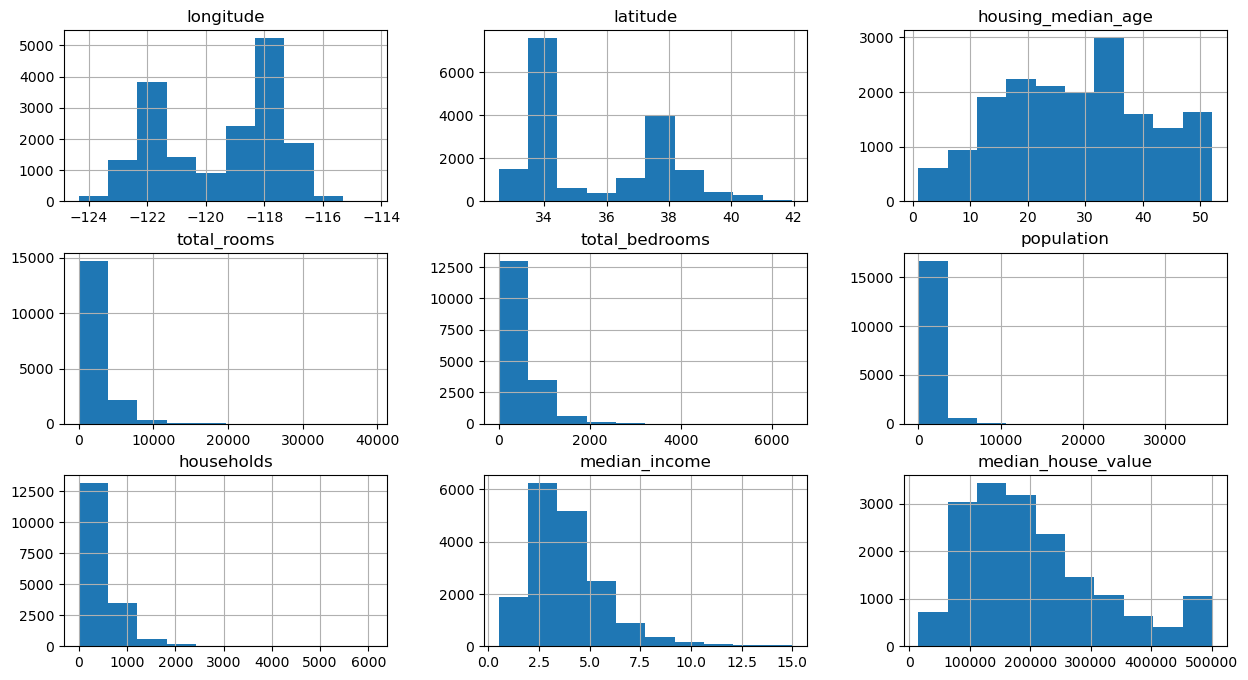

In [3]:
full_train_data.hist(figsize = (15, 8))#graph training data

<AxesSubplot:>

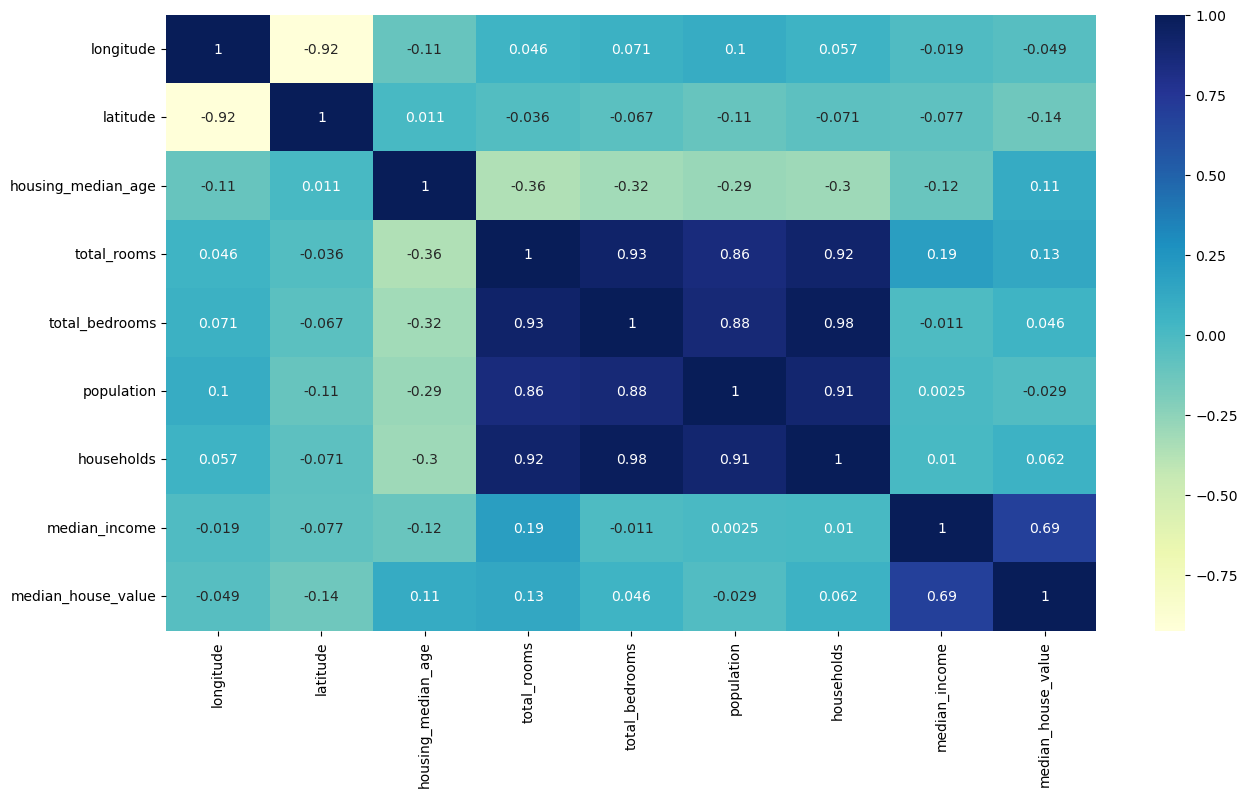

In [4]:
plt.figure(figsize = (15,8))
sns.heatmap(full_train_data.corr(), annot=True, cmap = "YlGnBu")

In [5]:
full_train_data['total_rooms'] = np.log(full_train_data['total_rooms'] + 1)  #log data to make data less skewed
full_train_data['total_bedrooms'] = np.log(full_train_data['total_bedrooms'] + 1)
full_train_data['population'] = np.log(full_train_data['population'] + 1)
full_train_data['households'] = np.log(full_train_data['households'] + 1)

In [6]:
full_train_data = full_train_data.join(pd.get_dummies(full_train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#split ocean proximity into multiple fields to allow each possibility to be represented by either 0 or 1

<AxesSubplot:>

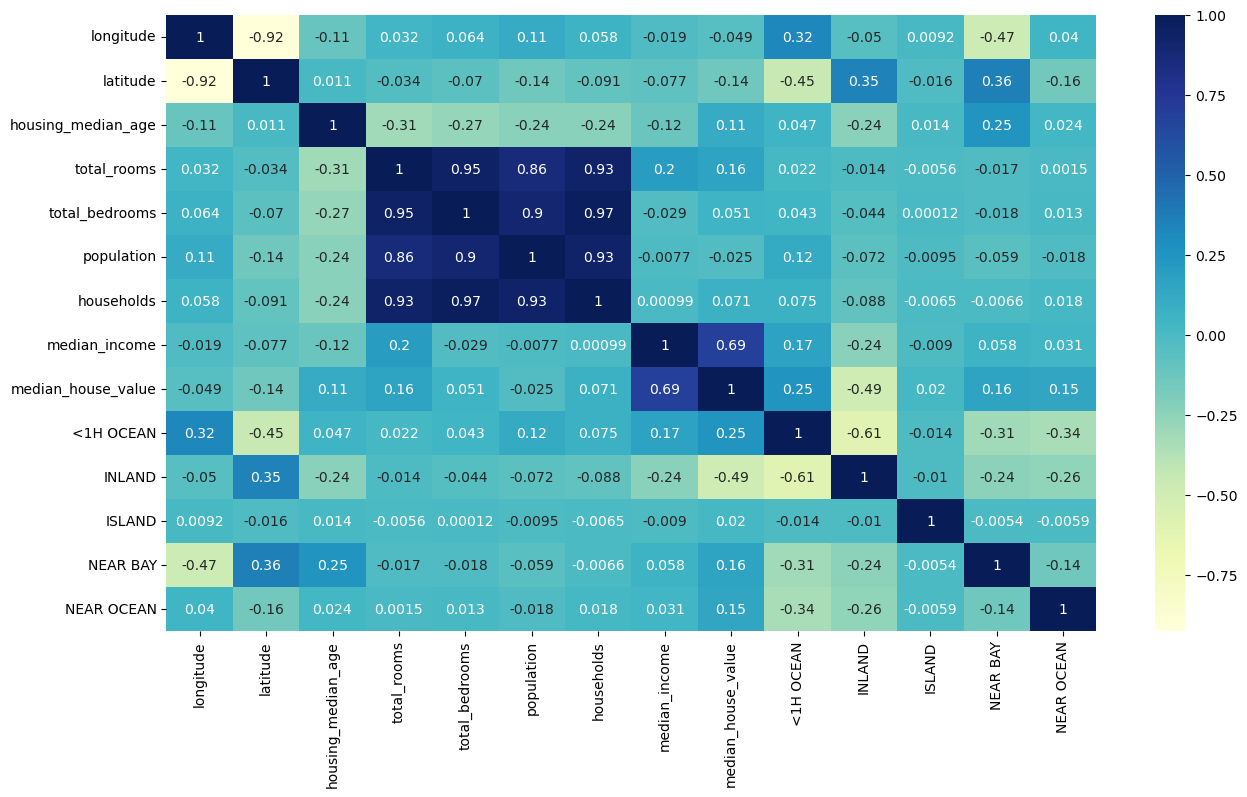

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(full_train_data.corr(), annot = True, cmap = "YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

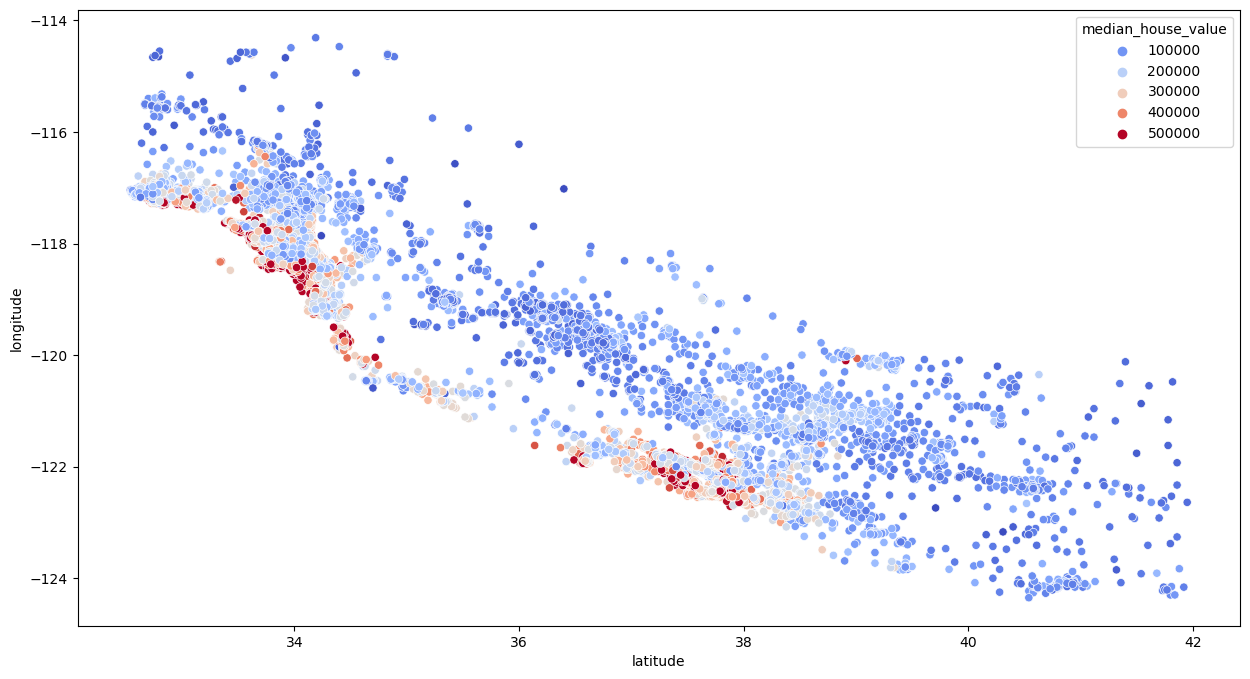

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data= full_train_data, hue="median_house_value", palette="coolwarm")

<AxesSubplot:>

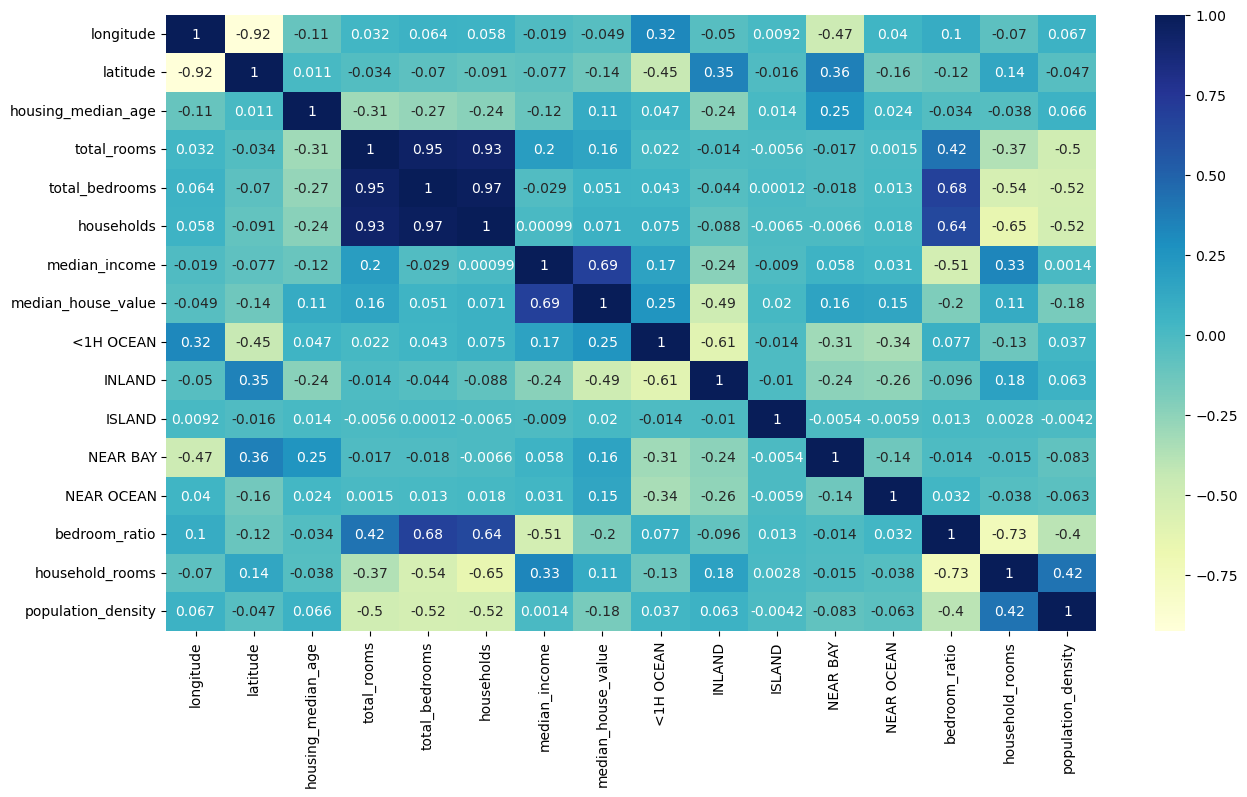

In [9]:
#create new data points that may affect the income
full_train_data['bedroom_ratio'] = full_train_data['total_bedrooms'] / full_train_data['total_rooms'] 
full_train_data['household_rooms'] = full_train_data ['total_rooms'] / full_train_data['households']
full_train_data['population_density'] = full_train_data['population'] / full_train_data['households']

#remove data that does not have much affect
full_train_data = full_train_data.drop(["population"], axis = 1)


plt.figure(figsize=(15,8))
sns.heatmap(full_train_data.corr(), annot= True, cmap = "YlGnBu")

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#Implement linear regression model
scaler = StandardScaler()

input_train, output_train = full_train_data.drop(['median_house_value'], axis = 1), full_train_data['median_house_value']
input_train_s = scaler.fit_transform(input_train)

reg = LinearRegression()

reg.fit(input_train_s, output_train)

LinearRegression()

In [11]:
full_test_data = input_test.join(output_test)


#Modify test data to match training data
full_test_data['total_rooms'] = np.log(full_test_data['total_rooms'] + 1)
full_test_data['total_bedrooms'] = np.log(full_test_data['total_bedrooms'] + 1)
full_test_data['population'] = np.log(full_test_data['population'] + 1)
full_test_data['households'] = np.log(full_test_data['households'] + 1)

full_test_data = full_test_data.join(pd.get_dummies(full_test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

full_test_data['bedroom_ratio'] = full_test_data['total_bedrooms'] / full_test_data["total_rooms"]
full_test_data['household_rooms'] = full_test_data['total_rooms'] / full_test_data["households"]
full_test_data['population_density'] = full_test_data['population'] / full_test_data['households']

full_test_data = full_test_data.drop(["population"], axis = 1)



In [12]:
input_test, output_test = full_test_data.drop(['median_house_value'], axis = 1), full_test_data['median_house_value']

In [13]:
input_test_s = scaler.transform(input_test)

In [14]:
reg.score(input_test_s, output_test) #Test linear regression model

0.6616343107028622

In [15]:
from sklearn.ensemble import RandomForestRegressor

#Implement random forest regressor model
forest = RandomForestRegressor()

forest.fit(input_train_s, output_train)

RandomForestRegressor()

In [18]:
forest.score(input_test_s, output_test) #Test random forest regressor model

0.809784604372276

In [20]:
from sklearn.model_selection import GridSearchCV
#Implement GridSearchCV model

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring = "neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(input_train_s, output_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
grid_search.best_estimator_ #Check optimal inputs

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [22]:
grid_search.best_estimator_.score(input_test_s, output_test) #Test optomized model

0.8120650802925533